Height，Width，Channel: (512, 512)


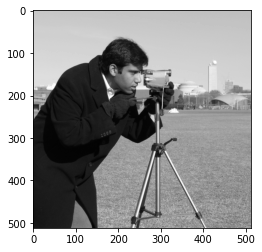

In [3]:
## read opencv package
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
from skimage import data
import numpy as np 
####################################################################

## read image
image = data.camera() 
## see dimenstion of picture
dimension = image.shape
## show the graph
plt.imshow(image, cmap='gray')
print("Height，Width，Channel:",dimension) 

In [88]:
## see the data 
image

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [96]:
## define correlation function 
def convolution_function(img,kernal):
    temp  = data.camera()
    test_image = data.camera()

    dimension = img.shape
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            if np.any(np.array([i-1,j-1])<0)!=True and np.any(np.array([i+1,j+1])>511)!=True:
                
                convolution = np.array([[temp[i-1][j-1],temp[i-1][j],temp[i-1][j+1]],
                                        [temp[i][j-1],temp[i][j],temp[i][j+1]],
                                        [temp[i+1][j-1],temp[i+1][j],temp[i+1][j+1]]])
                test_image[i][j]=abs(np.sum((convolution*kernal)))
                #print(test_image)
            else:
                test_image[i][j]=test_image[i][j]
    #return(test_image)            
    plt.imshow(test_image, cmap='gray')

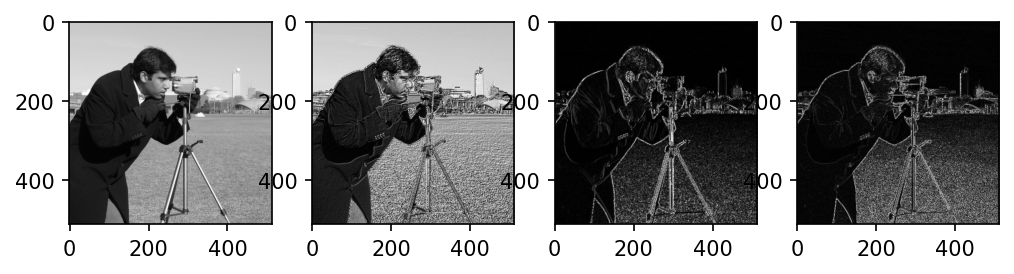

In [97]:
####  Implement convolution operators by myself function
figure(figsize=(8, 6), dpi=150)


## Original
plt.subplot(141)  
plt.imshow(image, cmap='gray')

## Kernal = emboss
plt.subplot(142)  
kernal_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
convolution_function(data.camera(),kernal_emboss)

## Kernal = left_sobel
plt.subplot(143)  
kernal_left_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
convolution_function(data.camera(),kernal_left_sobel)

## Kernal = outline
plt.subplot(144)  
kernal_outline = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
convolution_function(data.camera(),kernal_outline)

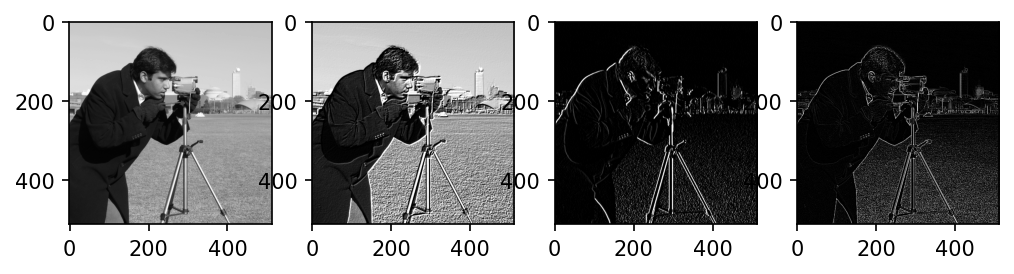

In [59]:
####  Implement convolution operators using OpenCV package
figure(figsize=(8, 6), dpi=150)
## Original
plt.subplot(141)  
plt.imshow(image, cmap='gray')

## Kernal = emboss
plt.subplot(142)  
kernal_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernal_emboss)
plt.imshow(img, cmap='gray')

## Kernal = left_sobel
plt.subplot(143)  
kernal_left_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernal_left_sobel)
plt.imshow(img, cmap='gray')

## Kernal = outline
plt.subplot(144)  
kernal_outline = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernal_outline)
plt.imshow(img, cmap='gray')